In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


time_cerave = pd.read_csv('multiTimeline_cerave.csv', skiprows=2)
time_curology = pd.read_csv('multiTimeline-3.csv', skiprows=2)
time_neutrogena = pd.read_csv('multiTimeline_neutrogena.csv', skiprows=2)

geo_cerave = pd.read_csv('geoMap_cerave.csv')
geo_curology = pd.read_csv('geoMap_curology.csv')
geo_neutrogena =pd.read_csv('geoMap_neutrogena.csv')

relatedEntities_cerave = pd.read_csv('relatedEntities_cerave.csv', skiprows=2)
relatedEntities_curology = pd.read_csv('relatedEntities_curology.csv', skiprows=2)
relatedEntities_neutrogena = pd.read_csv('relatedEntities_neutrogena.csv', skiprows=2)

relatedQueries_cerave = pd.read_csv('relatedQueries.csv', skiprows=2)
relatedQueries_curology = pd.read_csv('relatedQueries_curology.csv', skiprows=2)
relatedQueries_neutrogena = pd.read_csv('relatedQueries_neutrogena.csv', skiprows=2)

In [52]:
import json
hyram_cerave = open('hyram_analytics.json')
jenna_neutrogena = open('jennaortega_analytics.json')
bretman_curology = open('bretmanrock_analytics.json')
doctorly_cerave = open('doctorly_analytics.json')
jennifer_neutrogena = open('jennifer.garner_analytics.json')
emma_curology = open('emmachamberlain_analytics.json')
blake_cerave = open('blakelively_analytics.json')
olivia_cerave = open('oliviawilde_analytics.json')
amber_curology = open('_amberalexander_analytics.json')

cerave_hyram = json.load(hyram_cerave)
neutrogena_jenna = json.load(jenna_neutrogena)
curology_bretman = json.load(bretman_curology)
cerave_doctorly = json.load(doctorly_cerave)
neutrogena_jennifer = json.load(jennifer_neutrogena)
curology_emma = json.load(emma_curology)
cerave_blake = json.load(blake_cerave)
cerave_olivia = json.load(olivia_cerave)
curology_amber = json.load(amber_curology)

influencers = ["Hyram", "Jenna Ortega", "Bretman Rock", "Doctorly", "Jennifer Garner", "Emma Chamberlain", "Blake Lively", "Olivia Wilde", "Amber Alexander"]
type_ = ["Influencer", "Celebrity", "Influencer", "Influencer", "Celebrity", "Influencer", "Celebrity", "Celebrity", "Influencer"]
brand = ["Cerave", "Neutrogena", "Curology", "Cerave", "Neutrogena", "Curology", "Cerave", "Cerave", "Curology"]
datasets = [cerave_hyram, neutrogena_jenna, curology_bretman, cerave_doctorly, neutrogena_jennifer, curology_emma, cerave_blake, cerave_olivia, curology_amber]


def read_json(data):
    cleandata = data['audience_likers']['data']
    return cleandata
    
def get_female(data):
    if(data['audience_genders'][0]['code'] == 'FEMALE'):
        female_weight = data['audience_genders'][0]['weight']
    else:
        female_weight = data['audience_genders'][1]['weight']
    return female_weight

def get_male(data):
    if data['audience_genders'][0]['code'] == 'MALE':
        male_weight = data['audience_genders'][0]['weight']
    else:
        male_weight = data['audience_genders'][1]['weight']
    return(male_weight)

def get_ages(data):
    age_data = data['audience_ages']
    agegroups = []
    for i in range(6):
        agegroups.append(age_data[i]['code'])
    return agegroups
       
def age_weight(data):
    age_data = data['audience_ages']
    agegroups_weight = []
    for i in range(6):
        agegroups_weight.append(age_data[i]['weight'])
    return agegroups_weight
    
def age_male(data):
    age_gender_data = data["audience_genders_per_age"]
    age_male = []
    for i in range(6):
        age_male.append(age_gender_data[i]['code'] + " male")
    return age_male
def age_female(data):
    age_gender_data = data["audience_genders_per_age"]
    age_female = []
    for i in range(6):
        age_female.append(age_gender_data[i]['code'] + " female")
    return age_female

def age_male_weight(data):
    age_gender_data = data["audience_genders_per_age"]
    age_male = []
    for i in range(6):
        age_male.append(age_gender_data[i]['male'])
    return age_male
def age_female_weight(data):
    age_gender_data = data["audience_genders_per_age"]
    age_female = []
    for i in range(6):
        age_female.append(age_gender_data[i]['female'])
    return age_female

def ethnicities(data):
    ethnicities_data = data["audience_ethnicities"]
    ethnicities = []
    for i in range(4):
        ethnicities.append(ethnicities_data[i]["name"])
    return ethnicities

def ethnicities_weight(data):
    ethnicities_data = data["audience_ethnicities"]
    ethnicities_weight = []
    for i in range(4):
        ethnicities_weight.append(ethnicities_data[i]["weight"])
    return ethnicities_weight

def country(data):
    country = data["audience_geo"]['countries']
    countries = []
    for i in range(len(country)):
        countries.append(country[i]["name"])
    return countries

def country_weight(data):
    country = data["audience_geo"]['countries']
    country_weight = []
    for i in range(len(country)):
        country_weight.append(country[i]['weight'])
    return country_weight

def state(data):
    states = data["audience_geo"]['states']
    state = []
    for i in range(len(states)):
        state.append(states[i]['name'])
    return state

def state_weight(data):
    states = data["audience_geo"]['states']
    state = []
    for i in range(len(states)):
        state.append(states[i]['weight'])
    return state

clean_datasets = []
for i in range(len(datasets)):
    clean_datasets.append(read_json(datasets[i]))
    
female = []
for i in range(len(clean_datasets)):
    female.append(get_female(clean_datasets[i]))
    
male = []
for i in range(len(clean_datasets)):
    male.append(get_male(clean_datasets[i]))

ages = []
for i in range(len(clean_datasets)):
    ages.append(get_ages(clean_datasets[i]))
    
age_weights = []
for i in range(len(clean_datasets)):
    age_weights.append(age_weight(clean_datasets[i]))
    
age_groups_female = []
for i in range(len(clean_datasets)):
    age_groups_female.append(age_female(clean_datasets[i]))

age_groups_male = []
for i in range(len(clean_datasets)):
    age_groups_male.append(age_male(clean_datasets[i]))
    
agefemale_weight = []
for i in range(len(clean_datasets)):
    agefemale_weight.append(age_female_weight(clean_datasets[i]))

agemale_weight = []
for i in range(len(clean_datasets)):
    agemale_weight.append(age_male_weight(clean_datasets[i]))

states = []
for i in range(len(clean_datasets)):
    states.append(state(clean_datasets[i]))
    
state_weights = []
for i in range(len(clean_datasets)):
    state_weights.append(state_weight(clean_datasets[i]))

countries = []
for i in range(len(clean_datasets)):
    countries.append(country(clean_datasets[i]))
    
country_weights = []
for i in range(len(clean_datasets)):
    country_weights.append(country_weight(clean_datasets[i]))
    
ethnicity_name = []
for i in range(len(clean_datasets)):
    ethnicity_name.append(ethnicities(clean_datasets[i]))

ethnicity_weight = []
for i in range(len(clean_datasets)):
    ethnicity_weight.append(ethnicities_weight(clean_datasets[i]))

In [53]:
influencer = pd.DataFrame({
    "Name": influencers,
    "Influencer or Celebrity": type_,
    "Brand": brand,
    "Female Weight": female,
    "Male Weight": male,
    "Age Groups": ages,
    "Age Group Weight": age_weights,
    "Age Groups Female": age_groups_female,
    "Age Female Weight": agefemale_weight,
    "Age Groups Male": age_groups_male,
    "Age Male Weight": agemale_weight,
    "States": states,
    "State Weight": state_weights,
    "Country": countries,
    "Country Weight": country_weights,
    "Ethnicities": ethnicity_name,
    "Ethnicities Weight": ethnicity_weight
})

influencer

,Name,Influencer or Celebrity,Brand,Female Weight,Male Weight,Age Groups,Age Group Weight,Age Groups Female,Age Female Weight,Age Groups Male,Age Male Weight,States,State Weight,Country,Country Weight,Ethnicities,Ethnicities Weight
0,Hyram,Influencer,Cerave,0.925356,0.074644,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.152658, 0.531062, 0.278881, 0.031206, 0.006...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.147123, 0.495726, 0.251777, 0.026381, 0.004...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.005534, 0.035335, 0.027105, 0.004825, 0.001...","[California, New York, Florida, Texas, Illinoi...","[0.081845, 0.041667, 0.037698, 0.035466, 0.014...","[United States, United Kingdom, Canada, Austra...","[0.46999, 0.092262, 0.047123, 0.021329, 0.0203...","[African American, Asian, White / Caucasian, H...","[0.052774, 0.168876, 0.707169, 0.071181]"
1,Jenna Ortega,Celebrity,Neutrogena,0.858065,0.141935,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.17371, 0.602722, 0.206876, 0.012465, 0.0039...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.159504, 0.518797, 0.170044, 0.007729, 0.001...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.014207, 0.083925, 0.036832, 0.004736, 0.002...","[California, Florida, Texas, New York, Pennsyl...","[0.07002, 0.035577, 0.03399, 0.025153, 0.01065...","[United States, Mexico, Brazil, Argentina, Fra...","[0.39293, 0.064809, 0.044867, 0.038069, 0.0321...","[African American, Asian, White / Caucasian, H...","[0.133269, 0.103654, 0.533075, 0.230002]"
2,Bretman Rock,Influencer,Curology,0.903355,0.096645,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.095875, 0.478569, 0.388147, 0.033502, 0.003...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.087326, 0.43499, 0.351657, 0.026413, 0.0029...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.008549, 0.043579, 0.03649, 0.007089, 0.0009...","[California, Texas, New York, Florida, Hawaii,...","[0.148058, 0.062136, 0.042718, 0.038511, 0.016...","[United States, Philippines, Australia, Canada...","[0.546926, 0.130744, 0.02767, 0.026699, 0.0258...","[Hispanic, White / Caucasian, African American...","[0.083657, 0.507437, 0.088678, 0.320227]"
3,Doctorly,Influencer,Cerave,0.746204,0.253796,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.045119, 0.346358, 0.460153, 0.118228, 0.029...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.036548, 0.261125, 0.338731, 0.085849, 0.023...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.008571, 0.085233, 0.121422, 0.032379, 0.006...","[California, New York, Florida, Texas, Georgia...","[0.093902, 0.040343, 0.03872, 0.033851, 0.0136...","[United States, India, Canada, United Kingdom,...","[0.423139, 0.094366, 0.03872, 0.036402, 0.0299...","[African American, Asian, Hispanic, White / Ca...","[0.129158, 0.150685, 0.106654, 0.613502]"
4,Jennifer Garner,Celebrity,Neutrogena,0.898176,0.101824,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.034551, 0.213026, 0.326717, 0.243655, 0.178...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.032193, 0.196672, 0.290179, 0.220524, 0.155...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.002357, 0.016354, 0.036538, 0.023131, 0.023...","[California, New York, Texas, Florida, Pennsyl...","[0.113853, 0.043539, 0.043306, 0.041676, 0.017...","[United States, Brazil, Canada, United Kingdom...","[0.597206, 0.046333, 0.041211, 0.029569, 0.023...","[African American, Hispanic, White / Caucasian...","[0.035754, 0.110128, 0.770693, 0.083425]"
5,Emma Chamberlain,Influencer,Curology,0.908424,0.091576,"[13-17, 18-24, 25-34, 35-44, 45-64, 65-]","[0.135721, 0.577389, 0.266981, 0.017441, 0.002...","[13-17 female, 18-24 female, 25-34 female, 35-...","[0.127757, 0.526917, 0.238525, 0.01346, 0.0016...","[13-17 male, 18-24 male, 25-34 male, 35-44 mal...","[0.007963, 0.050472, 0.028456, 0.003982, 0.000...","[California, Florida, Texas, New York, Illinoi...","[0.091893, 0.047689, 0.044571, 0.038151, 0.021...","[United States, Un

## Analysing how marketing campaigns affected Curology

        Month  curology: (United States) Start Date  \
0  2018-02-01                         23        NaT   
1  2018-03-01                         27        NaT   
2  2018-04-01                         27        NaT   
3  2018-05-01                         34        NaT   
4  2018-06-01                         45 2018-06-01   
5  2018-07-01                         44 2018-07-01   
6  2018-08-01                         43 2018-08-01   
7  2018-09-01                         37        NaT   
8  2018-10-01                         41        NaT   
9  2018-11-01                         49        NaT   
10 2018-12-01                         46        NaT   
11 2019-01-01                         61        NaT   
12 2019-02-01                         68        NaT   
13 2019-03-01                         60        NaT   
14 2019-04-01                         59        NaT   
15 2019-05-01                         63        NaT   
16 2019-06-01                         66        NaT   
17 2019-07

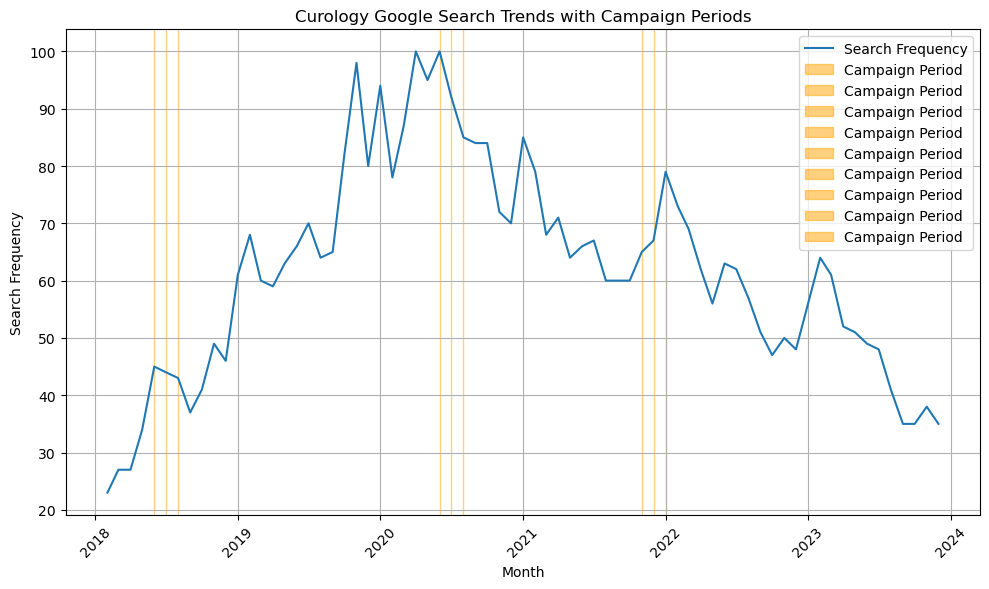

In [62]:
# Analysing how marketing campaigns affected curology growth

import matplotlib.pyplot as plt
# Convert 'Month' column to datetime
time_curology['Month'] = pd.to_datetime(time_curology['Month'])


# Load the data showing period of campaign CSV file into a DataFrame
campaign_data = pd.read_csv('Campaign dates- curology - Sheet1 (2).csv')

# Convert 'Start Date' and 'End Date' columns to datetime format in campaign_data
campaign_data['Start Date'] = pd.to_datetime(campaign_data['Start Date'])

# Merge Google trend data with campaign data based on the 'Month' column
merged_data = pd.merge(time_curology, campaign_data, left_on='Month', right_on='Start Date', how='left')

# Visualize  the merged data
print(merged_data.head(50))  # Display the merged DataFrame for initial exploration

# Plotting the search trend
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Month'], merged_data['curology: (United States)'], label='Search Frequency')

# Highlighting campaign periods
campaign_periods = merged_data[~merged_data['Campaign Description'].isnull()]  # Filter rows with campaign descriptions

for index, row in campaign_periods.iterrows():
    plt.axvspan(row['Month'], row['Start Date'], color='orange', alpha=0.5, label='Campaign Period')

plt.title('Curology Google Search Trends with Campaign Periods')
plt.xlabel('Month')
plt.ylabel('Search Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
import scipy.stats as stats

Compare search volumes during campaign vs. non-campaign periods
campaign_volumes = merged_data[merged_data['Campaign Description'].notnull()]['curology: (United States)']
non_campaign_volumes = merged_data[merged_data['Campaign Description'].isnull()]['curology: (United States)']

# Perform a t-test for means
t_stat, p_value = stats.ttest_ind(campaign_volumes, non_campaign_volumes, nan_policy='omit')
print("T-Stat:", t_stat)
print("P-Value:", p_value)


T-Stat: 1.2386079526189895
P-Value: 0.21968798685308408


## Chi squared independence hypothesis test

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a new column indicating if a month had a campaign or not
merged_data['Had Campaign'] = merged_data['Campaign Description'].notnull()

# Calculate average search volume during campaign and non-campaign periods
avg_search_campaign = merged_data[merged_data['Had Campaign']]['curology: (United States)'].mean()
avg_search_no_campaign = merged_data[~merged_data['Had Campaign']]['curology: (United States)'].mean()

# Create a contingency table
contingency_table = pd.crosstab(merged_data['Had Campaign'], merged_data['curology: (United States)'])

# Perform Chi-squared independence test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05  # Significance level

if p < alpha:
    print(f"P-value ({p}) is less than alpha ({alpha}). Reject the null hypothesis.")
    print("There is a significant relationship between periods of higher search volume and ad campaigns.")
else:
    print(f"P-value ({p}) is greater than or equal to alpha ({alpha}). Fail to reject the null hypothesis.")
    print("There is no sufficient evidence to claim a relationship between periods of higher search volume and ad campaigns.")


Chi-squared statistic: 48.41487455197132
P-value: 0.3368222982138487
P-value (0.3368222982138487) is greater than or equal to alpha (0.05). Fail to reject the null hypothesis.
There is no sufficient evidence to claim a relationship between periods of higher search volume and ad campaigns.


In [70]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


# Load the USA map data (replace 'path/to/usa_shapefile.shp' with the path to your USA shapefile)
us_map = gpd.read_file('path/to/usa_shapefile.shp')

# Filter influencers' data for Curology
curology_influencers = influencer[influencer['Brand'] == 'Curology']

# Assign weights to states based on influencer presence
state_weights = {state: weight for states, weight in zip(curology_influencers['States'], curology_influencers['State Weight']) for state in states}

# Assign state weights to the US map data
us_map['State_Weight'] = us_map['name'].map(state_weights).fillna(0)

# Plotting the heatmap of state weights
fig, ax = plt.subplots(figsize=(10, 8))
us_map.boundary.plot(ax=ax)  # Plot the map boundary

# Plot the weighted heatmap
us_map.plot(column='State_Weight', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Weighted Heatmap of States with Curology Influencers')
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()


DriverError: path/to/usa_shapefile.shp: No such file or directory

/var/folders/kk/qgfc3nnj2y7_cm8bjkqc3yrr0000gn/T/ipykernel_54371/1844957419.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ValueError: aspect must be finite and positive 

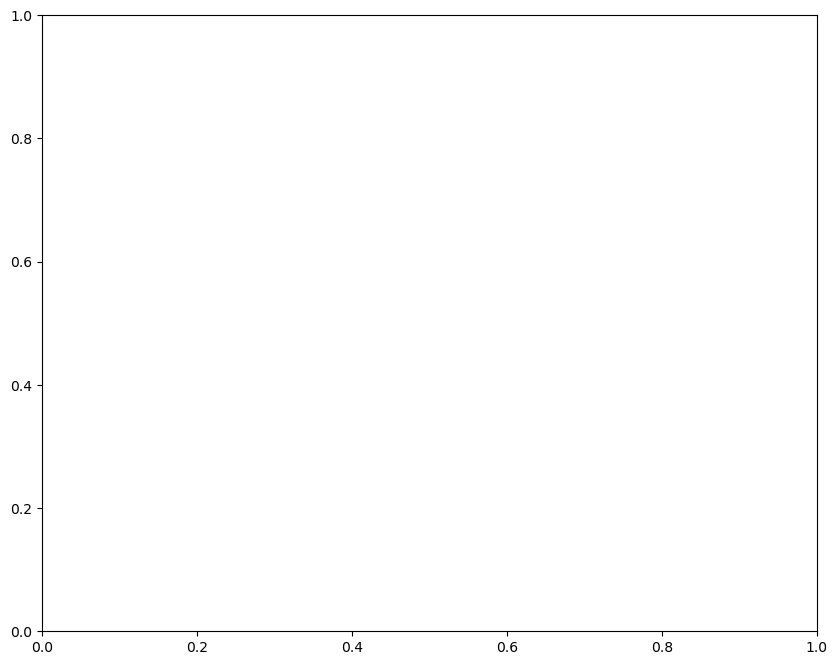